Instructions
In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

Create a copy of the dataframe for the data wrangling.

Normalize the continuous variables. You can use any one method you want.

Encode the categorical variables (See the hint below for encoding categorical data!!!)

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import date
from datetime import datetime
from datetime import timedelta

In [2]:
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

data2 = data.copy()
data2['etd_day'] = data2.effective_to_date.apply(lambda x: x.day)
data2['etd_month'] = data2.effective_to_date.apply(lambda x: x.month)
data2.head()

In [4]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [5]:
data2=data.copy()

In [6]:
data2=data2.drop_duplicates()

In [7]:
cols=[]
for column in data2.columns:
    cols.append(column.lower())
data2.columns=cols 

In [8]:
# remove spaces in columns names
data2.columns = data2.columns.str.replace(' ','_')

In [9]:
data2=data2[data2['income']>0]

In [10]:
data2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize


In [11]:
data2=data2.reset_index(drop=True)
data2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
2,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
3,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
4,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize


In [12]:
data2['effective_to_date'] = pd.to_datetime(data2['effective_to_date'], errors='coerce')

In [13]:
data2['effective_to_date'].value_counts()

2011-02-14    148
2011-01-10    144
2011-01-27    136
2011-02-05    133
2011-01-26    133
2011-01-20    133
2011-01-17    133
2011-01-05    133
2011-01-28    132
2011-01-03    129
2011-01-31    129
2011-01-19    129
2011-02-03    129
2011-02-26    129
2011-02-01    126
2011-01-21    126
2011-01-11    125
2011-02-27    125
2011-02-10    124
2011-01-15    123
2011-01-29    123
2011-02-19    122
2011-01-02    121
2011-02-18    121
2011-02-04    119
2011-02-07    119
2011-01-25    118
2011-01-23    117
2011-02-09    116
2011-01-09    115
2011-01-14    115
2011-02-11    114
2011-01-07    114
2011-02-12    114
2011-02-17    112
2011-02-16    110
2011-02-20    110
2011-02-28    110
2011-01-16    107
2011-01-01    107
2011-02-21    105
2011-01-08    105
2011-02-02    105
2011-02-25    104
2011-01-18    104
2011-02-13    102
2011-01-06    102
2011-02-06    101
2011-01-13    101
2011-01-30    101
2011-02-22    100
2011-01-12    100
2011-01-24    100
2011-02-23     98
2011-02-15     97
2011-02-08

In [14]:
data2['eff_to_date_day'] = data2.effective_to_date.apply(lambda x: x.day)
data2['eff_to_date_week'] = data2.effective_to_date.apply(lambda x: x.week)
data2['eff_to_date_month'] = data2.effective_to_date.apply(lambda x: x.month)
data2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,eff_to_date_day,eff_to_date_week,eff_to_date_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2
1,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2
2,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2
3,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,4,1
4,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,24,8,2


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       6817 non-null   object        
 1   state                          6817 non-null   object        
 2   customer_lifetime_value        6817 non-null   float64       
 3   response                       6817 non-null   object        
 4   coverage                       6817 non-null   object        
 5   education                      6817 non-null   object        
 6   effective_to_date              6817 non-null   datetime64[ns]
 7   employmentstatus               6817 non-null   object        
 8   gender                         6817 non-null   object        
 9   income                         6817 non-null   int64         
 10  location_code                  6817 non-null   object        
 11  marital_status   

In [16]:
data2_num=data2.select_dtypes(include=np.number)
data2_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,eff_to_date_day,eff_to_date_week,eff_to_date_month
0,2763.519279,56274,69,32,5,0,1,384.811147,24,8,2
1,12887.431650,48767,108,18,38,0,2,566.472247,19,7,2
2,2813.692575,43836,73,12,44,0,1,138.130879,3,5,2
3,8256.297800,62902,69,14,94,0,2,159.383042,25,4,1
4,5380.898636,55350,67,0,13,0,9,321.600000,24,8,2


In [17]:
data2_cat=data2.select_dtypes(include=object)
data2_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
2,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
3,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
4,XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize


In [18]:
def renew_offer_num(text):
    return int(text.replace("Offer", ''))

def adding_renew_offer_num(df):
    df2=df.copy()
    df2['renew_offer_type']=df2['renew_offer_type'].apply(renew_offer_num)
    return df2

In [19]:
data2_cat=adding_renew_offer_num(data2_cat)
display(data2_cat)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,1,Agent,Two-Door Car,Medsize
1,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,1,Agent,Two-Door Car,Medsize
2,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,1,Agent,Four-Door Car,Medsize
3,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,2,Web,Two-Door Car,Medsize
4,XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,TF56202,California,No,Basic,College,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,2,Call Center,Two-Door Car,Small
6813,YM19146,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,1,Branch,Four-Door Car,Large
6814,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,2,Web,Four-Door Car,Medsize
6815,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,1,Branch,Four-Door Car,Medsize


In [20]:
def clean_policy(text):
    if isinstance(text,str):
        return (text[:-4])
    else:
        return text
    
def clean_policy_add(df):
    df2=df.copy()
    df2['policy_type'] = data_cat1['policy_type'].apply(clean_policy)

In [21]:
data2_cat['policy_type'] = data2_cat['policy_type'].apply(clean_policy)
display(data2_cat.head())

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Corporate L3,1,Agent,Two-Door Car,Medsize
1,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Personal L3,1,Agent,Two-Door Car,Medsize
2,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Personal L1,1,Agent,Four-Door Car,Medsize
3,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal,Personal L3,2,Web,Two-Door Car,Medsize
4,XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate,Corporate L3,1,Agent,Four-Door Car,Medsize


In [22]:
def uniquevalue_df(df):
    
    uniquevalues=[]
    
    df2=df.copy()
    for col in df2.columns:
        uniquevalues.append(df2[col].unique())
    return list(zip(df2.columns,uniquevalues))

uniquevalue_df(data2_cat)

# i wanted to look nicer and i have tried a lot but i don't know how to make it any better

[('customer',
  array(['BU79786', 'AI49188', 'HB64268', ..., 'LA72316', 'PK87824',
         'UP19263'], dtype=object)),
 ('state',
  array(['Washington', 'Nevada', 'Oregon', 'California', 'Arizona'],
        dtype=object)),
 ('response', array(['No', 'Yes'], dtype=object)),
 ('coverage', array(['Basic', 'Premium', 'Extended'], dtype=object)),
 ('education',
  array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
        dtype=object)),
 ('employmentstatus',
  array(['Employed', 'Medical Leave', 'Disabled', 'Retired'], dtype=object)),
 ('gender', array(['F', 'M'], dtype=object)),
 ('location_code', array(['Suburban', 'Rural', 'Urban'], dtype=object)),
 ('marital_status', array(['Married', 'Single', 'Divorced'], dtype=object)),
 ('policy_type', array(['Corporate ', 'Personal ', 'Special '], dtype=object)),
 ('policy',
  array(['Corporate L3', 'Personal L3', 'Personal L1', 'Special L2',
         'Corporate L1', 'Corporate L2', 'Personal L2', 'Special L1',
         'Sp

Encoder Type	Column

One hot	state

Ordinal	coverage

Ordinal	employmentstatus

Ordinal	location code

One hot	marital status

One hot	policy type

One hot	policy

One hot	renew offercustomer_df

One hot	sales channel

One hot	vehicle class

Ordinal	vehicle size

FYI : Auto Extended Warranty Market Size, Share and Forecast | 2030 (https://www.alliedmarketresearch.com/auto-extended-warranty-market-A12526)

In [23]:
data2_cat["coverage"] = data2_cat["coverage"].map({"Basic" : 0, "Premium" : 1, "Extended" : 2})

In [24]:
data2_cat["employmentstatus"] = data2_cat["employmentstatus"].map({"Employed" : 0, "Medical Leave" : 1, "Disabled" : 2, "Retired":3})

In [25]:
data2_cat["marital_status"] = data2_cat["marital_status"].map({"Married" : 0, "Single" : 1, "Divorced" : 2})

In [26]:
data2_cat["location_code"] = data2_cat["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [27]:
data2_cat["vehicle_size"] = data2_cat["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [28]:
data2_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,0,Bachelor,0,F,0,0,Corporate,Corporate L3,1,Agent,Two-Door Car,0
1,AI49188,Nevada,No,1,Bachelor,0,F,0,0,Personal,Personal L3,1,Agent,Two-Door Car,0
2,HB64268,Washington,No,0,Bachelor,0,M,1,1,Personal,Personal L1,1,Agent,Four-Door Car,0
3,OC83172,Oregon,Yes,0,Bachelor,0,F,1,0,Personal,Personal L3,2,Web,Two-Door Car,0
4,XZ87318,Oregon,Yes,0,College,0,F,0,0,Corporate,Corporate L3,1,Agent,Four-Door Car,0


In [29]:
data2_temp_combine=pd.concat([data2_num,data2_cat],axis=1)
data2_temp_combine.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,eff_to_date_day,eff_to_date_week,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,24,8,...,0,F,0,0,Corporate,Corporate L3,1,Agent,Two-Door Car,0
1,12887.431650,48767,108,18,38,0,2,566.472247,19,7,...,0,F,0,0,Personal,Personal L3,1,Agent,Two-Door Car,0
2,2813.692575,43836,73,12,44,0,1,138.130879,3,5,...,0,M,1,1,Personal,Personal L1,1,Agent,Four-Door Car,0
3,8256.297800,62902,69,14,94,0,2,159.383042,25,4,...,0,F,1,0,Personal,Personal L3,2,Web,Two-Door Car,0
4,5380.898636,55350,67,0,13,0,9,321.600000,24,8,...,0,F,0,0,Corporate,Corporate L3,1,Agent,Four-Door Car,0


In [30]:
data2_num=data2_temp_combine.select_dtypes(include=np.number)
data2_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,eff_to_date_day,eff_to_date_week,eff_to_date_month,coverage,employmentstatus,location_code,marital_status,renew_offer_type,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,24,8,2,0,0,0,0,1,0
1,12887.431650,48767,108,18,38,0,2,566.472247,19,7,2,1,0,0,0,1,0
2,2813.692575,43836,73,12,44,0,1,138.130879,3,5,2,0,0,1,1,1,0
3,8256.297800,62902,69,14,94,0,2,159.383042,25,4,1,0,0,1,0,2,0
4,5380.898636,55350,67,0,13,0,9,321.600000,24,8,2,0,0,0,0,1,0


In [31]:
data2_cat=data2_temp_combine.select_dtypes(include=object)
data2_cat.head()

,customer,state,response,education,gender,policy_type,policy,sales_channel,vehicle_class
0,BU79786,Washington,No,Bachelor,F,Corporate,Corporate L3,Agent,Two-Door Car
1,AI49188,Nevada,No,Bachelor,F,Personal,Personal L3,Agent,Two-Door Car
2,HB64268,Washington,No,Bachelor,M,Personal,Personal L1,Agent,Four-Door Car
3,OC83172,Oregon,Yes,Bachelor,F,Personal,Personal L3,Web,Two-Door Car
4,XZ87318,Oregon,Yes,College,F,Corporate,Corporate L3,Agent,Four-Door Car


In [32]:
data2_cat=data2_cat.drop('customer', axis=1)
data2_cat.head()

,state,response,education,gender,policy_type,policy,sales_channel,vehicle_class
0,Washington,No,Bachelor,F,Corporate,Corporate L3,Agent,Two-Door Car
1,Nevada,No,Bachelor,F,Personal,Personal L3,Agent,Two-Door Car
2,Washington,No,Bachelor,M,Personal,Personal L1,Agent,Four-Door Car
3,Oregon,Yes,Bachelor,F,Personal,Personal L3,Web,Two-Door Car
4,Oregon,Yes,College,F,Corporate,Corporate L3,Agent,Four-Door Car


the nominal categoricals are now ready for encoding. lets see if we can fix the distribution on the x variables before data combining. but first we concat back the data

In [33]:
data2=pd.concat([data2_num,data2_cat],axis=1)

In [34]:
data2.shape

(6817, 25)

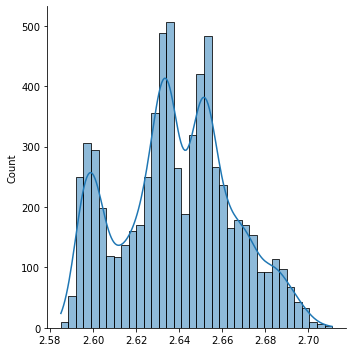

In [35]:
xt, lmbda = stats.boxcox(data2['customer_lifetime_value'])

sns.displot(xt, kde=True)

plt.show()

Check for outliers

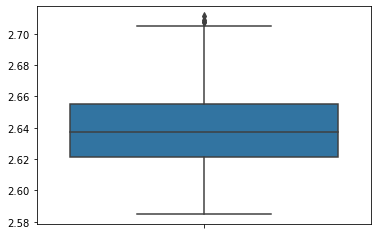

In [36]:
sns.boxplot(y=xt)
plt.show()

In [37]:
custlifeboxcox=pd.DataFrame(xt)
display(custlifeboxcox)

,0
0,2.600798
1,2.667356
2,2.601810
3,2.651761
4,2.634193
...,...
6812,2.631188
6813,2.621540
6814,2.684671
6815,2.607086


In [38]:
custlifeboxcox[0].value_counts()

2.633792    6
2.613699    6
2.590105    6
2.659075    6
2.641440    6
           ..
2.635516    1
2.625773    1
2.638883    1
2.602607    1
2.648180    1
Name: 0, Length: 5892, dtype: int64

In [39]:
iqr = np.percentile(custlifeboxcox[0],75) - np.percentile(custlifeboxcox[0],25)
upper_limit = np.percentile(custlifeboxcox[0],75) + 1.5*iqr

In [40]:
print(upper_limit)

2.7060857835885153


In [41]:
indexes_to_drop_cuslifeboxcox = custlifeboxcox[custlifeboxcox[0]>upper_limit].index
#df = df.drop(indexes_to_drop_cuslifeboxcox)

In [42]:
#def modifyoutlier(num):
#    #df2=df.copy()    
#    if num>upper_limit:
#        return upper_limit
#    else: 
#        return num
    


        

In [43]:
#def replace_na_by_mean(num):   
#    mean = 1
#    if pd.isna(num):
#        return mean
#    else: 
#        return num

In [44]:
custlifeboxcox[custlifeboxcox[0]>upper_limit]

,0
3925,2.707133
4269,2.711114
4660,2.708945
5454,2.707632


In [45]:
custlifeboxcox= custlifeboxcox.rename(columns={0:"customer_lifetime_value_boxcox"})

In [46]:
custlifeboxcox.shape

(6817, 1)

In [47]:
#custlifeboxcox.loc[3925,:]=upper_limit
#custlifeboxcox.loc[4269,:]=upper_limit
#custlifeboxcox.loc[4660,:]=upper_limit
#custlifeboxcox.loc[5454,:]=upper_limit

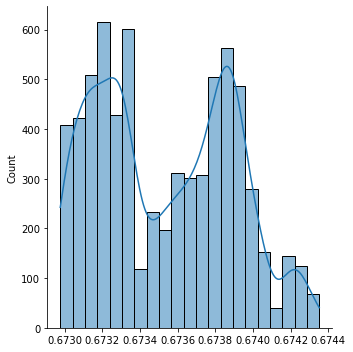

In [48]:
xt1, lmbda = stats.boxcox(data2['monthly_premium_auto'])

sns.displot(xt1, kde=True)

plt.show()

Check for outliers

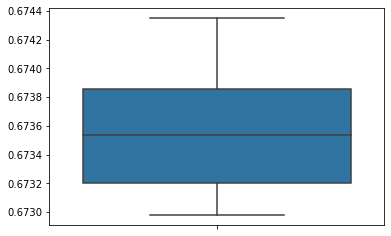

In [49]:
sns.boxplot(y=xt1)
plt.show()

In [50]:
monthly_prem_autoboxcox=pd.DataFrame(xt1)


In [51]:
monthly_prem_autoboxcox[0].value_counts()

0.673113    271
0.673283    242
0.673144    238
0.673047    227
0.672976    216
           ... 
0.674252      1
0.674344      1
0.674282      1
0.674300      1
0.674176      1
Name: 0, Length: 190, dtype: int64

In [52]:
monthly_prem_autoboxcox= monthly_prem_autoboxcox.rename(columns={0:"monthly_premium_auto_boxcox"})
display(monthly_prem_autoboxcox)

,monthly_premium_auto_boxcox
0,0.673230
1,0.673845
2,0.673332
3,0.673230
4,0.673174
...,...
6812,0.673081
6813,0.673808
6814,0.673332
6815,0.673461


now lets do this for the Y

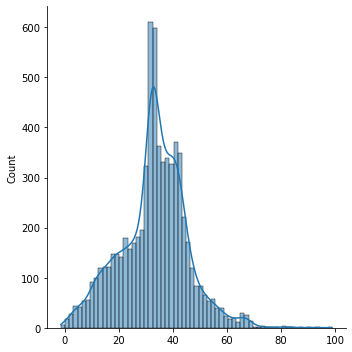

In [53]:
xt2, lmbda = stats.boxcox(data2['total_claim_amount'])

sns.displot(xt2, kde=True)

plt.show()

Check for outliers

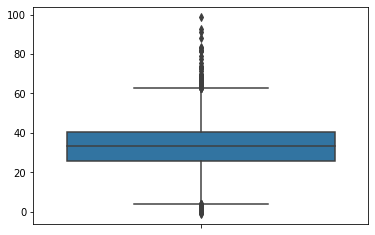

In [54]:
sns.boxplot(y=xt2)
plt.show()

In [55]:
total_claim_amountboxcox=pd.DataFrame(xt2)


In [56]:
total_claim_amountboxcox[0].value_counts()

32.153395    91
31.898902    79
30.860366    79
32.405926    78
32.905278    78
             ..
35.213082     1
38.893839     1
32.087849     1
26.231028     1
48.047321     1
Name: 0, Length: 4140, dtype: int64

In [57]:
iqr = np.percentile(total_claim_amountboxcox[0],75) - np.percentile(total_claim_amountboxcox[0],25)
upper_limit2 = np.percentile(total_claim_amountboxcox[0],75) + 1.5*iqr

In [58]:
print(upper_limit2)

62.73220352603313


In [59]:
total_claim_amountboxcox[total_claim_amountboxcox[0]>upper_limit2]

,0
149,78.742602
312,66.637951
367,66.821320
378,63.951181
383,63.858611
...,...
6504,73.016678
6549,65.186618
6686,66.739503
6762,91.043420


In [60]:
upperindexes_to_drop_totclaim_amountboxcox = total_claim_amountboxcox[total_claim_amountboxcox[0]>upper_limit2].index
#df = df.drop(indexes_to_drop_cuslifeboxcox)

In [61]:
iqr = np.percentile(total_claim_amountboxcox[0],75) - np.percentile(total_claim_amountboxcox[0],25)
lower_limit2 = np.percentile(total_claim_amountboxcox[0],25) - 1.5*iqr

In [62]:
lowerindexes_to_drop_totclaim_amountboxcox = total_claim_amountboxcox[total_claim_amountboxcox[0]<lower_limit2].index

In [63]:
total_claim_amountboxcox= total_claim_amountboxcox.rename(columns={0:"total_claim_amount_boxcox"})

In [64]:
data2_all=pd.concat([data2,custlifeboxcox,monthly_prem_autoboxcox,total_claim_amountboxcox],axis=1)

In [65]:
data2_all=data2_all.drop(upperindexes_to_drop_totclaim_amountboxcox)

In [66]:
#data2_all.reset_index(drop=True)

In [67]:
data2_all=data2_all.drop(lowerindexes_to_drop_totclaim_amountboxcox)

In [68]:
data2_all

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,eff_to_date_day,eff_to_date_week,...,response,education,gender,policy_type,policy,sales_channel,vehicle_class,customer_lifetime_value_boxcox,monthly_premium_auto_boxcox,total_claim_amount_boxcox
0,2763.519279,56274,69,32,5,0,1,384.811147,24,8,...,No,Bachelor,F,Corporate,Corporate L3,Agent,Two-Door Car,2.600798,0.673230,35.567174
1,12887.431650,48767,108,18,38,0,2,566.472247,19,7,...,No,Bachelor,F,Personal,Personal L3,Agent,Two-Door Car,2.667356,0.673845,43.400190
2,2813.692575,43836,73,12,44,0,1,138.130879,3,5,...,No,Bachelor,M,Personal,Personal L1,Agent,Four-Door Car,2.601810,0.673332,20.739408
3,8256.297800,62902,69,14,94,0,2,159.383042,25,4,...,Yes,Bachelor,F,Personal,Personal L3,Web,Two-Door Car,2.651761,0.673230,22.391804
4,5380.898636,55350,67,0,13,0,9,321.600000,24,8,...,Yes,College,F,Corporate,Corporate L3,Agent,Four-Door Car,2.634193,0.673174,32.405926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,5032.165498,66367,64,6,48,0,3,307.200000,12,6,...,No,College,M,Personal,Personal L3,Call Center,Two-Door Car,2.631188,0.673081,31.642401
6813,4100.398533,47761,104,16,58,0,1,541.282007,6,1,...,No,College,F,Personal,Personal L2,Branch,Four-Door Car,2.621540,0.673808,42.399992
6814,23405.987980,71941,73,18,89,0,2,198.234764,10,6,...,No,Bachelor,M,Personal,Personal L1,Web,Four-Door Car,2.684671,0.673332,25.144027
6815,3096.511217,21604,79,14,28,0,1,379.200000,12,6,...,Yes,College,F,Corporate,Corporate L3,Branch,Four-Door Car,2.607086,0.673461,35.297845


In [69]:
data2_all.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'eff_to_date_day', 'eff_to_date_week', 'eff_to_date_month', 'coverage',
       'employmentstatus', 'location_code', 'marital_status',
       'renew_offer_type', 'vehicle_size', 'state', 'response', 'education',
       'gender', 'policy_type', 'policy', 'sales_channel', 'vehicle_class',
       'customer_lifetime_value_boxcox', 'monthly_premium_auto_boxcox',
       'total_claim_amount_boxcox'],
      dtype='object')

In [70]:
data2_all[data2_all['customer_lifetime_value_boxcox']>upper_limit]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,eff_to_date_day,eff_to_date_week,...,response,education,gender,policy_type,policy,sales_channel,vehicle_class,customer_lifetime_value_boxcox,monthly_premium_auto_boxcox,total_claim_amount_boxcox
4269,83325.38119,58958,231,31,74,0,2,1108.800000,31,5,...,No,High School or Below,M,Personal,Personal L3,Call Center,Luxury Car,2.711114,0.674286,61.078234
4660,73225.95652,39547,202,11,21,0,2,969.600000,9,6,...,No,Bachelor,F,Personal,Personal L3,Branch,Luxury SUV,2.708945,0.674240,57.068307
5454,67907.27050,78310,192,34,18,1,2,151.711475,5,5,...,No,Bachelor,M,Personal,Personal L1,Agent,Sports Car,2.707632,0.674219,21.809107


In [71]:
indexes_to_drop_cuslifeboxcox=data2_all[data2_all['customer_lifetime_value_boxcox']>upper_limit].index

In [72]:
data2_all=data2_all.drop(indexes_to_drop_cuslifeboxcox)

In [73]:
data2_all.reset_index(inplace=True, drop=True)

In [74]:
data2_all.isna().sum()

customer_lifetime_value           0
income                            0
monthly_premium_auto              0
months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
total_claim_amount                0
eff_to_date_day                   0
eff_to_date_week                  0
eff_to_date_month                 0
coverage                          0
employmentstatus                  0
location_code                     0
marital_status                    0
renew_offer_type                  0
vehicle_size                      0
state                             0
response                          0
education                         0
gender                            0
policy_type                       0
policy                            0
sales_channel                     0
vehicle_class                     0
customer_lifetime_value_boxcox    0
monthly_premium_auto_boxcox       0
total_claim_amount_boxcox   

TIME TO RUN PREDICTION MODEL:

X-y split

In [75]:
y=data2_all['total_claim_amount_boxcox']

In [76]:
X=data2_all.drop(['customer_lifetime_value','monthly_premium_auto','total_claim_amount','total_claim_amount_boxcox'],axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [78]:
numericals_train = X_train.select_dtypes(include=np.number)
numericals_test = X_test.select_dtypes(include=np.number)
numericals_train.head()

,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,eff_to_date_day,eff_to_date_week,eff_to_date_month,coverage,employmentstatus,location_code,marital_status,renew_offer_type,vehicle_size,customer_lifetime_value_boxcox,monthly_premium_auto_boxcox
2814,97735,24,26,0,1,26,8,2,0,0,2,2,2,0,2.604251,0.673332
740,86689,3,72,0,1,27,4,1,2,0,0,1,2,1,2.611627,0.673567
4120,59523,0,62,1,8,23,3,1,2,0,2,0,1,2,2.640244,0.673441
4607,23120,5,87,0,1,9,6,2,2,0,0,0,3,0,2.616468,0.673683
3569,40810,8,14,0,2,10,2,1,0,0,0,0,1,0,2.669411,0.673895


In [79]:
categoricals_train= X_train.select_dtypes(include=object)
categoricals_test= X_test.select_dtypes(include=object)
categoricals_train.head()

,state,response,education,gender,policy_type,policy,sales_channel,vehicle_class
2814,California,No,High School or Below,M,Corporate,Corporate L2,Branch,Four-Door Car
740,California,No,High School or Below,M,Corporate,Corporate L3,Agent,Two-Door Car
4120,California,No,Bachelor,M,Personal,Personal L1,Branch,Four-Door Car
4607,Arizona,No,High School or Below,F,Personal,Personal L3,Agent,Four-Door Car
3569,California,No,College,M,Personal,Personal L2,Branch,SUV


In [80]:
#from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals_train)

# Here, after applying the encoder the resulting array will have lots of 0's. When this happens, by default 
# sklearn returns a new type of variable called "np.sparse_array". This new type of variable saves a lot of
# memory because it only stores the location of the non 0 values for each row. However, we can't visualize it
# To avoid this, we need to use .toarray()
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()

# Here, the encoder will automatically assign new columns names based on the possible values of each column as
# "column_name" + "_" + "value". Those values were NOT PRESENT in the original categoricals_train df. Therefore,
# we can't simply add the option "columns = categoricals_train df" because we will have a missmatch. However,
# the new column names are stored in the encoder and we can access to them with the method: encoder.get_feature_names_out()
# that we need to assign to the option "columns=" when we define the df.
categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out())
categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
display(categoricals_train_encoded.head())
display(categoricals_test_encoded.head())

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,...,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,...,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
numericals_train.isna().sum()
#X_test = np.concatenate([numericals_test,categoricals_test_encoded],axis=1)

income                            0
months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
eff_to_date_day                   0
eff_to_date_week                  0
eff_to_date_month                 0
coverage                          0
employmentstatus                  0
location_code                     0
marital_status                    0
renew_offer_type                  0
vehicle_size                      0
customer_lifetime_value_boxcox    0
monthly_premium_auto_boxcox       0
dtype: int64

In [82]:
numericals_train.head()

,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,eff_to_date_day,eff_to_date_week,eff_to_date_month,coverage,employmentstatus,location_code,marital_status,renew_offer_type,vehicle_size,customer_lifetime_value_boxcox,monthly_premium_auto_boxcox
2814,97735,24,26,0,1,26,8,2,0,0,2,2,2,0,2.604251,0.673332
740,86689,3,72,0,1,27,4,1,2,0,0,1,2,1,2.611627,0.673567
4120,59523,0,62,1,8,23,3,1,2,0,2,0,1,2,2.640244,0.673441
4607,23120,5,87,0,1,9,6,2,2,0,0,0,3,0,2.616468,0.673683
3569,40810,8,14,0,2,10,2,1,0,0,0,0,1,0,2.669411,0.673895


In [83]:
X_train = pd.concat([numericals_train.reset_index(drop=True),categoricals_train_encoded],axis=1)
X_test = pd.concat([numericals_test.reset_index(drop=True),categoricals_test_encoded],axis=1)

In [84]:
X_train.isna().sum()

income                            0
months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
eff_to_date_day                   0
eff_to_date_week                  0
eff_to_date_month                 0
coverage                          0
employmentstatus                  0
location_code                     0
marital_status                    0
renew_offer_type                  0
vehicle_size                      0
customer_lifetime_value_boxcox    0
monthly_premium_auto_boxcox       0
state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
response_Yes                      0
education_College                 0
education_Doctor                  0
education_High School or Below    0
education_Master                  0
gender_M                          0
policy_type_Personal              0
policy_type_Special         

In [85]:
#X_train = np.concatenate([numericals_train,categoricals_train_encoded],axis=1)
#X_test = np.concatenate([numericals_test,categoricals_test_encoded],axis=1)

In [86]:
#X_train.isna().sum()

In [87]:
#from sklearn.preprocessing import StandardScaler
StandardScalertransformer = StandardScaler()
StandardScalertransformer.fit(X_train)
X_train_standardized = StandardScalertransformer.transform(X_train)
X_test_standardized = StandardScalertransformer.transform(X_test)

In [88]:
X_train_standardized = pd.DataFrame(X_train_standardized, columns = X_train.columns )
X_test_standardized  = pd.DataFrame(X_test_standardized,  columns = X_test.columns  )
display(X_train_standardized.head())
display(X_test_standardized.head())

,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,eff_to_date_day,eff_to_date_week,eff_to_date_month,coverage,employmentstatus,...,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1.957289,0.887833,-0.773712,-0.420948,-0.814406,1.233401,0.203126,1.070503,-0.752277,-0.404567,...,-0.132085,-0.129099,1.581347,-0.488371,-0.406631,-0.115613,-0.117276,-0.488371,-0.235562,-0.519539
1,1.501998,-1.197794,0.871142,-0.420948,-0.814406,1.349548,-0.244823,-0.934140,1.470007,-0.404567,...,-0.132085,-0.129099,-0.632372,-0.488371,-0.406631,-0.115613,-0.117276,-0.488371,-0.235562,1.924782
2,0.382278,-1.495741,0.513565,0.684431,2.120062,0.884962,-0.356811,-0.934140,1.470007,-0.404567,...,-0.132085,-0.129099,1.581347,-0.488371,-0.406631,-0.115613,-0.117276,-0.488371,-0.235562,-0.519539
3,-1.118170,-0.999163,1.407507,-0.420948,-0.814406,-0.741087,-0.020849,1.070503,1.470007,-0.404567,...,-0.132085,-0.129099,-0.632372,-0.488371,-0.406631,-0.115613,-0.117276,-0.488371,-0.235562,-0.519539
4,-0.389029,-0.701216,-1.202805,-0.420948,-0.395196,-0.624941,-0.468798,-0.934140,-0.752277,-0.404567,...,-0.132085,-0.129099,1.581347,-0.488371,-0.406631,-0.115613,-0.117276,2.047623,-0.235562,-0.519539


,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,eff_to_date_day,eff_to_date_week,eff_to_date_month,coverage,employmentstatus,...,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,-0.750055,-1.098479,-0.273105,0.684431,-0.814406,-0.973380,-0.020849,1.070503,0.358865,-0.404567,...,-0.132085,-0.129099,-0.632372,2.047623,-0.406631,-0.115613,-0.117276,2.047623,-0.235562,-0.519539
1,0.976308,-0.204638,-0.666439,0.684431,-0.814406,1.233401,0.203126,1.070503,-0.752277,-0.404567,...,-0.132085,-0.129099,-0.632372,2.047623,-0.406631,-0.115613,-0.117276,-0.488371,-0.235562,-0.519539
2,-1.552193,0.689202,-1.667655,-0.420948,-0.395196,-0.392648,-0.468798,-0.934140,-0.752277,2.210582,...,-0.132085,-0.129099,-0.632372,-0.488371,-0.406631,-0.115613,-0.117276,-0.488371,-0.235562,1.924782
3,-0.644496,-0.701216,1.049930,0.684431,-0.395196,-1.089526,-0.580786,-0.934140,1.470007,-0.404567,...,-0.132085,-0.129099,-0.632372,-0.488371,2.459229,-0.115613,-0.117276,-0.488371,-0.235562,-0.519539
4,-0.051745,-0.899848,-0.666439,-0.420948,0.443223,-0.624941,-0.468798,-0.934140,-0.752277,-0.404567,...,-0.132085,-0.129099,-0.632372,2.047623,-0.406631,-0.115613,-0.117276,-0.488371,-0.235562,1.924782


Now data is ready for models testing

Linear Model:

In [89]:
lm = linear_model.LinearRegression()
lm.fit(X_train_standardized,y_train)
y_pred_train = lm.predict(X_train_standardized)
y_pred_test = lm.predict(X_test_standardized)
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [90]:
print(r2_score_train)
print(r2_score_test)

0.4035256113198362
0.3947025683888141


In [91]:
# Train a new k-NN model setting the value of weights = "distance" and keeping 6 neighbours.
# Compare the R2 of both models
# CREATING MULTIPLE MODELS AND ASSOCIATED ERROR SCORES AND SAVING THEM.
knn_models = []
scores = []
for k in range(2,15):
    knnmodel = KNeighborsRegressor(n_neighbors=k,  weights='distance')
    #print("Training the k-NN model with {} neihgbours...".format(k))
    knnmodel.fit( X_train_standardized, y_train)
    knn_models.append(knnmodel)
    scores.append(knnmodel.score( X_train_standardized, y_train))
    #print()
    

In [92]:
# THIS METHOD RETURNS THE INDEX AND THE ACTUAL INDEX ( THE K) AND THE ERROR.FOR VISUAL PURPOSES SINCE WE STARTED FROM K=2 
# THE 2 IS ADDED TO THE INDEX TO REFLECT THE START POINT OF K=2 . HOWEVER, IT JUST RENUMBERS. 
#IF WE RUN FROM 0, IT WILL RUN FROM 0 TO 12 INSTEAD FROM 2 TO 14 FOR THE SAME ERROR VALUES.
for index,score in enumerate(scores):
    print("The R2 of the k-nn model with {} neighbours on the TRAIN set was: {:.2f}".format(index+2,score))

The R2 of the k-nn model with 2 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 3 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 4 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 5 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 6 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 7 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 8 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 9 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 10 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 11 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 12 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 13 neighbours on the TRAIN set was: 1.00
The R2 of the k-nn model with 14 neighbours on the TRAIN set was: 1.00


KNN result looks really WEIRD

KNN PERFORMANCE AGAINST TEST SET:

In [93]:
# Train a new k-NN model setting the value of weights = "distance" and keeping 6 neighbours.
# Compare the R2 of both models
# CREATING MULTIPLE MODELS AND ASSOCIATED ERROR SCORES AND SAVING THEM.
knn_models = []
scores = []
for k in range(2,15):
    knnmodel = KNeighborsRegressor(n_neighbors=k,  weights='distance')
    #print("Training the k-NN model with {} neihgbours...".format(k))
    knnmodel.fit( X_train_standardized, y_train)
    knn_models.append(knnmodel)
    scores.append(knnmodel.score(X_test_standardized, y_test))
    #print()

In [94]:
# THIS METHOD RETURNS THE INDEX AND THE ACTUAL INDEX ( THE K) AND THE ERROR.FOR VISUAL PURPOSES SINCE WE STARTED FROM K=2 
# THE 2 IS ADDED TO THE INDEX TO REFLECT THE START POINT OF K=2 . HOWEVER, IT JUST RENUMBERS. 
#IF WE RUN FROM 0, IT WILL RUN FROM 0 TO 12 INSTEAD FROM 2 TO 14 FOR THE SAME ERROR VALUES.
for index,score in enumerate(scores):
    print("The R2 of the k-nn model with {} neighbours on the TEST set was: {:.2f}".format(index+2,score))

The R2 of the k-nn model with 2 neighbours on the TEST set was: 0.10
The R2 of the k-nn model with 3 neighbours on the TEST set was: 0.21
The R2 of the k-nn model with 4 neighbours on the TEST set was: 0.25
The R2 of the k-nn model with 5 neighbours on the TEST set was: 0.29
The R2 of the k-nn model with 6 neighbours on the TEST set was: 0.30
The R2 of the k-nn model with 7 neighbours on the TEST set was: 0.31
The R2 of the k-nn model with 8 neighbours on the TEST set was: 0.31
The R2 of the k-nn model with 9 neighbours on the TEST set was: 0.32
The R2 of the k-nn model with 10 neighbours on the TEST set was: 0.31
The R2 of the k-nn model with 11 neighbours on the TEST set was: 0.31
The R2 of the k-nn model with 12 neighbours on the TEST set was: 0.31
The R2 of the k-nn model with 13 neighbours on the TEST set was: 0.31
The R2 of the k-nn model with 14 neighbours on the TEST set was: 0.31


KNN result looks really BAD

In [95]:
# Get and print the R2 score of the model with 6 neighbours: ANOTHER WAY
print("The R2 of the k-nn model with neighbours on the TEST set was: {:.2f}".format(scores[7]))

The R2 of the k-nn model with neighbours on the TEST set was: 0.32


MLPRegressor TRAIN SET

In [96]:
MLPReg = MLPRegressor(random_state=14,max_iter=1000)
MLPReg=MLPReg.fit(X_train_standardized, y_train)
#regr.predict(X_test[:2])
MLPReg.score(X_train_standardized, y_train)


0.9709870952164867

MLPRegressor PERFORMANCE AGAINST TEST SET

In [97]:
#MLPRegressor = MLPRegressor(max_iter=500).fit(X_train_standardized, y_train)
#MLPReg = MLPRegressor(random_state=14,max_iter=1000)
MLPReg.score(X_test_standardized, y_test)


0.7748860740482291

In [99]:
def model_function(df, model_choice):
    data2_all = df.copy()
    y=data2_all['total_claim_amount_boxcox']
    X=data2_all.drop(['customer_lifetime_value','monthly_premium_auto','total_claim_amount','total_claim_amount_boxcox'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
    
    numericals_train = X_train.select_dtypes(include=np.number)
    numericals_test = X_test.select_dtypes(include=np.number)
    
    categoricals_train= X_train.select_dtypes(include=object)
    categoricals_test= X_test.select_dtypes(include=object)
    
    encoder = OneHotEncoder(handle_unknown='error', drop='first')
    encoder.fit(categoricals_train)
    categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
    categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()
    categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out())
    categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
    
    X_train = pd.concat([numericals_train.reset_index(drop=True),categoricals_train_encoded],axis=1)
    X_test = pd.concat([numericals_test.reset_index(drop=True),categoricals_test_encoded],axis=1)
    
    
    StandardScalertransformer = StandardScaler()
    StandardScalertransformer.fit(X_train)
    X_train_standardized = StandardScalertransformer.transform(X_train)
    X_test_standardized = StandardScalertransformer.transform(X_test)
    
    X_train_standardized = pd.DataFrame(X_train_standardized, columns = X_train.columns)
    X_test_standardized  = pd.DataFrame(X_test_standardized,  columns = X_test.columns)
    
    
    model = model_choice
    model.fit(X_train_standardized,y_train)
    

    y_pred_train = model.predict(X_train_standardized)
    y_pred_test = model.predict(X_test_standardized)
    r2_score_train = r2_score(y_train,y_pred_train)
    r2_score_test = r2_score(y_test,y_pred_test)
    
    return r2_score_train, r2_score_test

In [103]:
models = []
results_train = []
results_test = []
for k in range(2,15):
    models.append("Knn with {} neighbours".format(k))
    r1,r2 = model_function(data2_all,KNeighborsRegressor(n_neighbors=k,  weights='distance'))
    results_train.append(r1)
    results_test.append(r2)
    

models.append("Linear Model")
r1,r2 = model_function(data2_all,LinearRegression())
results_train.append(r1)
results_test.append(r2)

models.append("MLP Model")
r1,r2 = model_function(data2_all,MLPRegressor(random_state=14,max_iter=1000))
results_train.append(r1)
results_test.append(r2)

results_df = pd.DataFrame({'Model':models, 'R2_train':results_train, 'R2_test':results_test})
results_df

,Model,R2_train,R2_test
0,Knn with 2 neighbours,1.000000,0.104324
1,Knn with 3 neighbours,1.000000,0.206784
2,Knn with 4 neighbours,1.000000,0.252437
3,Knn with 5 neighbours,1.000000,0.291148
4,Knn with 6 neighbours,1.000000,0.304383
5,Knn with 7 neighbours,1.000000,0.307758
6,Knn with 8 neighbours,1.000000,0.312792
7,Knn with 9 neighbours,1.000000,0.315769
8,Knn with 10 neighbours,1.000000,0.306103
9,Knn with 11 neighbours,1.000000,0.310004
